## Class Size Paradox

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
data = pd.read_csv('../data/registrations.csv')
cs = pd.read_csv('../data/course-semesters.csv')
# student = pd.read_csv('../data/student0216.csv')

/home/jkim/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def make_list(student_ids):
    return student_ids[1:-1].split(',')

def classsize(student_ids):
    return len(student_ids[1:-1].split(','))

cs['studentid'] = cs['student_ids'].apply(make_list)
cs['classsize'] = cs['student_ids'].apply(classsize)
cs.head()

,code-semester,code,semester,name,prof,redundant_codes,prereqs,student_ids,studentid,classsize
0,AHS CAP SPR 0607FA,AHS CAP SPR,0607FA,AHS CapstoneSpring Pre-registration,"Martello, Robert",[],[],"[23925034, 99052948, 29826367, 91614816, 95699...","[23925034, 99052948, 29826367, 91614816, 9...",25
1,AHS CAP SPR 0708FA,AHS CAP SPR,0708FA,AHS CapstoneSpring Pre-registration,"Lynch, Caitrin",[],[],"[30876146, 98014488, 67373835, 67291012, 84935...","[30876146, 98014488, 67373835, 67291012, 8...",5
2,AHS1101 0203FA,AHS1101,0203FA,History and Society Bodies in Motion: Migratio...,"Fleischmann, Fritz",[],[],"[39854219, 16495441, 74816072, 85835441, 28902...","[39854219, 16495441, 74816072, 85835441, 2...",17
3,AHS1101 0304FA,AHS1101,0304FA,History and Society Bodies in Motion: Migratio...,"Fleischmann, Fritz",[],[],"[42715736, 29826367, 10463379, 22502956, 91614...","[42715736, 29826367, 10463379, 22502956, 9...",29
4,AHS1102 0203FA,AHS1102,0203FA,Arts and Humanities The Quest,"Tropp, Martin",[],[],"[41057699, 96482981, 16062888, 59108778, 39329...","[41057699, 96482981, 16062888, 59108778, 3...",24


In [3]:
cs_sem = cs.groupby('semester')

actuald = {}
for semester in cs_sem:
    actuald[semester[0]] = []
    for each_classsize in semester[1].classsize:
        if each_classsize > 2: #to exclude independent study, self study etc
            actuald[semester[0]].append(each_classsize)
    actuald[semester[0]] = np.mean(actuald[semester[0]])
print actuald

{'1011FA': 26.885245901639344, '1314SP': 21.852459016393443, '0405SP': 21.534883720930232, '0506FA': 23.96153846153846, '0607SP': 22.83050847457627, '1516SP': 19.16393442622951, '0910SP': 21.111111111111111, '0910FA': 25.29032258064516, '0405FA': 24.555555555555557, '0304SP': 29.61904761904762, '0708FA': 25.60377358490566, '0708SP': 19.032258064516128, '0304FA': 43.555555555555557, '0203FA': 44.899999999999999, '1415SP': 18.352941176470587, '1415FA': 25.016666666666666, '1213SP': 21.885245901639344, '0809SP': 21.032258064516128, '0203SP': 34.555555555555557, '1213FA': 23.411764705882351, '0506SP': 23.592592592592592, '0809FA': 24.666666666666668, '1112FA': 25.365079365079364, '1112SP': 19.546875, '1314FA': 25.278688524590162, '1516FA': 23.540983606557376, '0607FA': 21.646153846153847, '1011SP': 22.731343283582088}


In [4]:
data.head()

,studentid,semester,grade,major,concentration,code,section,coursetitle,sectiontitle,professor,course-sectiontitle,code-semester,Unnamed: 0,coursetype
0,30876146,0708FA,SR,Engineering,Computing,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Lynch, Caitrin",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0708FA,247,NaN
1,23925034,0607FA,SR,Engineering,Bioengineering,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN
2,99052948,0607FA,SR,Electr'l & Computer Engr,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN
3,29826367,0607FA,SR,Mechanical Engineering,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN
4,91614816,0607FA,SR,Mechanical Engineering,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN


In [5]:
full = pd.merge(data, cs[['code-semester','classsize']], how='left', on=['code-semester','code-semester'])

In [6]:
full.head()

,studentid,semester,grade,major,concentration,code,section,coursetitle,sectiontitle,professor,course-sectiontitle,code-semester,Unnamed: 0,coursetype,classsize
0,30876146,0708FA,SR,Engineering,Computing,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Lynch, Caitrin",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0708FA,247,NaN,5
1,23925034,0607FA,SR,Engineering,Bioengineering,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN,25
2,99052948,0607FA,SR,Electr'l & Computer Engr,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN,25
3,29826367,0607FA,SR,Mechanical Engineering,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN,25
4,91614816,0607FA,SR,Mechanical Engineering,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN,25


In [7]:
semesters = full.groupby('semester')
expectd = {}
for semester in semesters:
    students = semester[1].groupby('studentid')
    
    semclasssize = []
    for student in students:
        semclasssize.append(np.mean(student[1].classsize))
    
    expectd[semester[0]] = np.mean(semclasssize)
    
print expectd

{'1011FA': 46.514063820794597, '1314SP': 37.67588476478204, '0405SP': 41.319555405100424, '0506FA': 38.300618991728143, '0607SP': 40.469591611479025, '1516SP': 35.576986781334604, '0910SP': 38.874332552693204, '0910FA': 44.363826735513477, '0405FA': 37.404243827160492, '0304SP': 49.934909909909912, '0708FA': 42.698298178331733, '0708SP': 33.82287157287157, '0304FA': 58.626666666666665, '0203FA': 65.324444444444438, '1415SP': 37.986790293040293, '1415FA': 46.348911149825788, '1213SP': 38.083160173160174, '0809SP': 37.994301856335753, '0203SP': 59.915333333333329, '1213FA': 43.420838600927098, '0506SP': 37.858513189448438, '0809FA': 41.652199019142536, '1112FA': 45.492812777284833, '1112SP': 38.343700234192035, '1314FA': 48.413996900535359, '1516FA': 41.944379509379509, '0607FA': 40.830535910733929, '1011SP': 40.2717538967539}


([<matplotlib.axis.YTick at 0x7f77cf06bd50>,
 <a list of 28 Text yticklabel objects>)

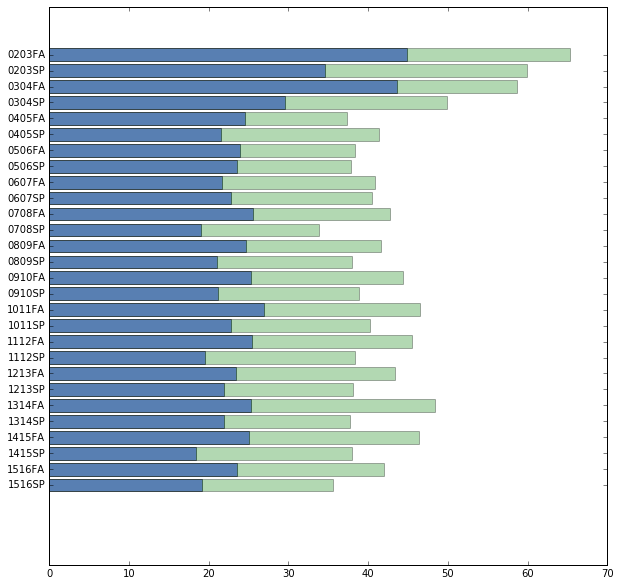

In [230]:
import collections

actualod = collections.OrderedDict(sorted(actuald.items(), reverse=True))
expectod = collections.OrderedDict(sorted(expectd.items(), reverse=True))

plt.figure(figsize=(10,10))
plt.barh(range(len(actualod)), actualod.values(), color = 'blue', align='center', alpha = 0.5)
plt.barh(range(len(expectod)), expectod.values(), color = 'green', align='center', alpha = 0.3)
plt.yticks(range(len(actualod)), actualod.keys())

In [17]:
classparadox= pd.DataFrame({'semester':expectd.keys(), 'actsem': actuald.keys(), 
                            'expected':expectd.values(), 'actual': actuald.values()})
classparadox.head(100)

,actsem,actual,expected,semester
0,1011FA,26.885246,46.514064,1011FA
1,1314SP,21.852459,37.675885,1314SP
2,0405SP,21.534884,41.319555,0405SP
3,0506FA,23.961538,38.300619,0506FA
4,0607SP,22.830508,40.469592,0607SP
5,1516SP,19.163934,35.576987,1516SP
6,0910SP,21.111111,38.874333,0910SP
7,0910FA,25.290323,44.363827,0910FA
8,0405FA,24.555556,37.404244,0405FA
9,0304SP,29.619048,49.934910,0304SP


In [22]:
# del classparadox['actsem']

def integer(value):
    return int(value)

classparadox['actual_class_size'] = classparadox['actual'].apply(integer)
classparadox['student_prediction'] = classparadox['expected'].apply(integer)
classparadox.head()

,actual,expected,semester,actual_class_size,student_prediction
0,26.885246,46.514064,1011FA,26,46
1,21.852459,37.675885,1314SP,21,37
2,21.534884,41.319555,0405SP,21,41
3,23.961538,38.300619,0506FA,23,38
4,22.830508,40.469592,0607SP,22,40


The blue bar shows the actual average class size and the green bar shows what the students will expect the average class size to be based on the courses they take.

In [23]:
classparadox.to_csv('../data/classparadox.csv')